# Adult Income Dataset Analysis
## 1. Introduction

This notebook analyzes the Adult Income Dataset, which contains demographic information and predicts whether an individual's income exceeds $50K/year. 

Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Kaggle: https://www.kaggle.com/code/alperugurca/adult-income-dataset

Github: https://github.com/alperugurca/aygaz-data-analysis-bootcamp-2024

## 2. Import Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [128]:
sns.set_theme(style="darkgrid", palette="husl")

## 3. Load and Examine Data

In [3]:
df = pd.read_csv('/kaggle/input/adult-income-dataset/adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe(include="all")

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 4. Data Cleaning and Preprocessing

In [7]:
df.isnull().sum().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 4.1. df['age']

In [90]:
display(df['age'].unique())
display(df['age'].dtype)

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86])

dtype('int64')

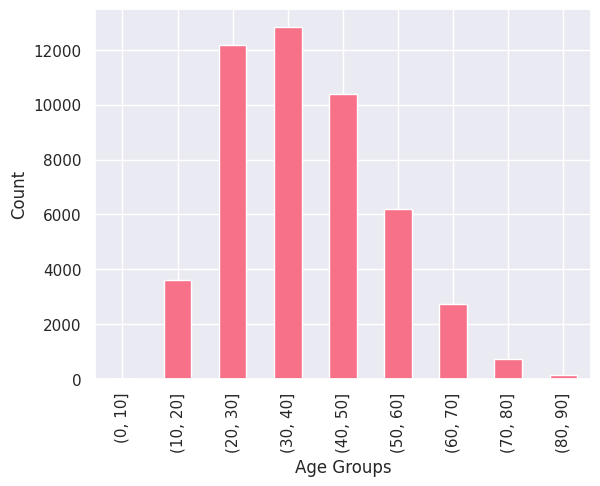

In [10]:
age_bins = pd.cut(df['age'], bins=range(0, 100, 10))

age_bins.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

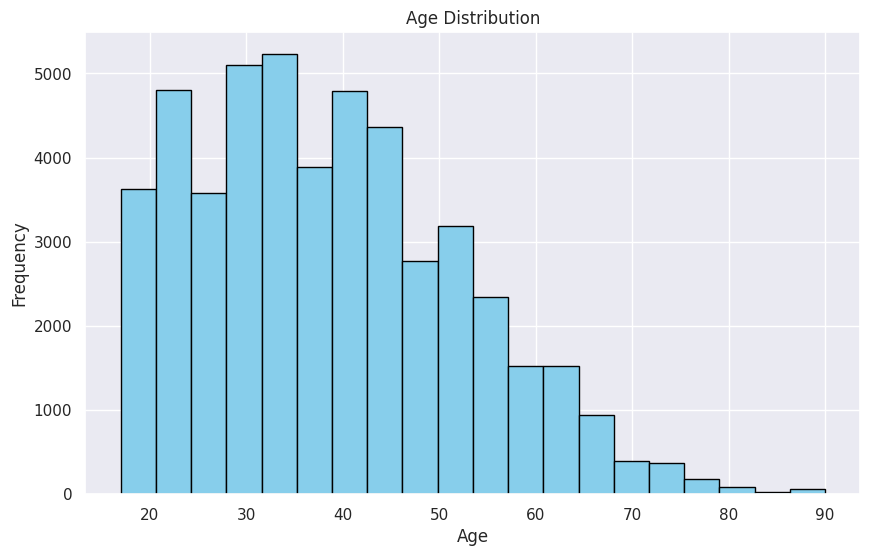

In [92]:
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

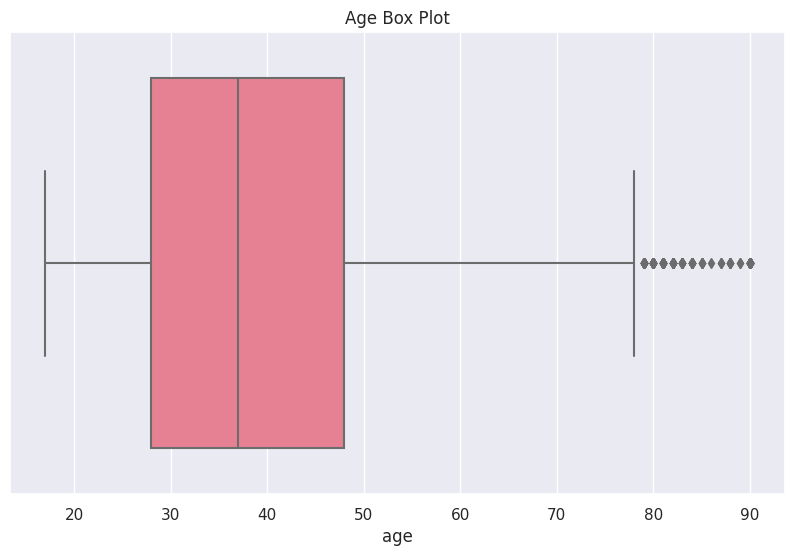

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['age'])
plt.title('Age Box Plot')
plt.show()

#### 4.1.1. df['age']
* Numeric column (continuous)
* No obvious data quality issues

### 4.2 df['workclass']

In [11]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [99]:
display(df['workclass'].value_counts())
display(df['workclass'].dtype)

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

dtype('O')

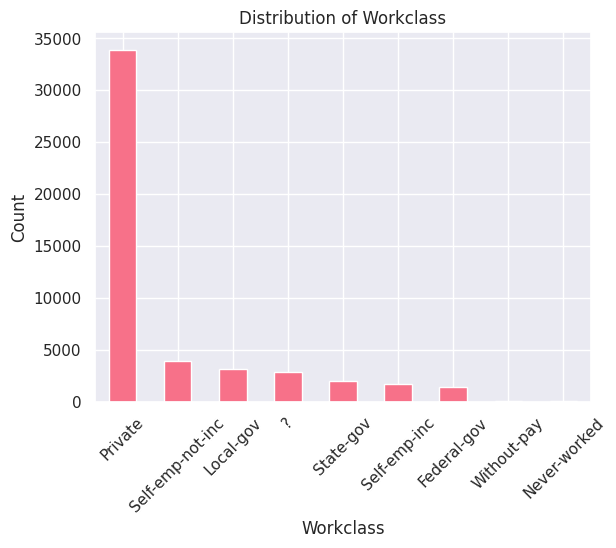

In [13]:
import matplotlib.pyplot as plt

df['workclass'].value_counts().plot(kind='bar')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.xticks(rotation=45)
plt.show()

In [14]:
df.replace('?', df['workclass'].mode()[0], inplace=True)

#### 4.2.1. df['workclass']
* Categorical column
* Contains missing values (marked as )
* Imbalanced distribution: "Private" sector is dominant

### 4.3. df['fnlwgt']

In [107]:
df['fnlwgt'].mean()

189664.13459727284

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


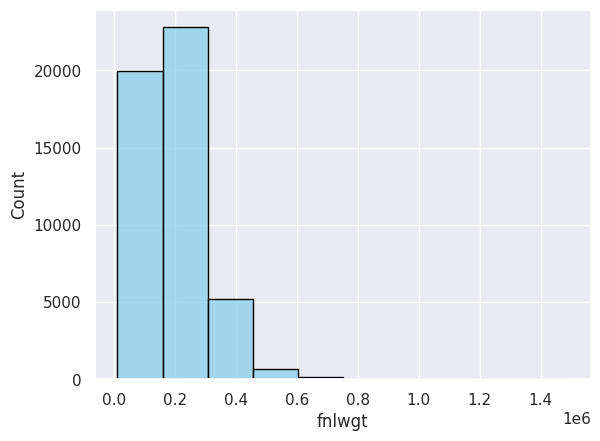

In [109]:
sns.histplot(df['fnlwgt'], bins=10, kde=False, color='skyblue', edgecolor='black');

#### 4.3.1. df['fnlwgt']
* Numeric column (continuous)
* Large range of values

### 4.4. df['education']

In [16]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

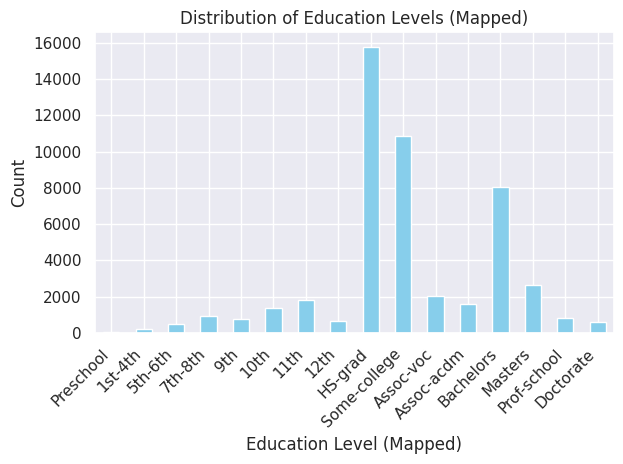

In [17]:
education_map = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5,
    '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10,
    'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13, 'Masters': 14,
    'Prof-school': 15, 'Doctorate': 16
}

df['education_numeric'] = df['education'].map(education_map)

df['education_numeric'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Education Level (Mapped)')
plt.ylabel('Count')
plt.title('Distribution of Education Levels (Mapped)')
plt.xticks(ticks=range(16), labels=[key for key in education_map.keys()], rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 4.4.1. df['education']
* Categorical column
* Imbalanced: HS-grad and Some-college appear most frequent

### 4.5. df['educational-num']

In [19]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

Text(0.5, 1.0, 'Distribution of Education Levels')

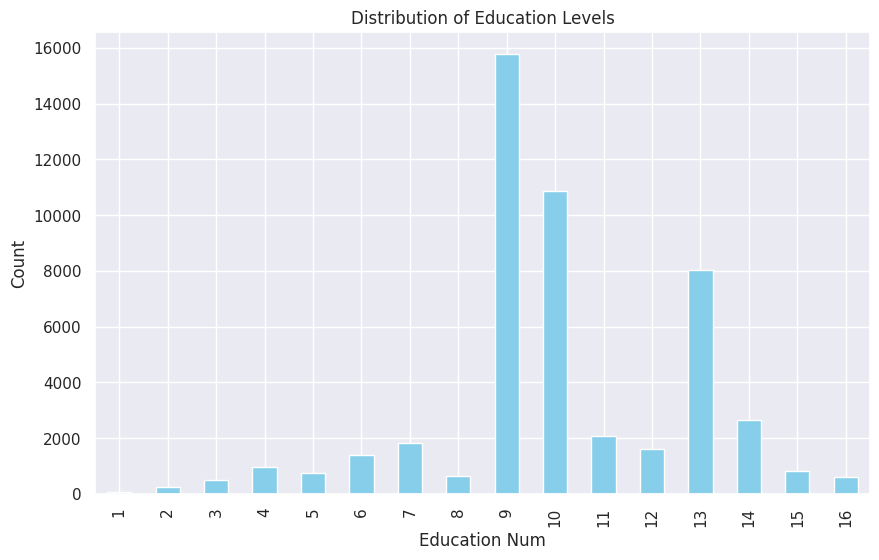

In [112]:
education_counts = df['educational-num'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Education Num')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')

#### 4.5.1. df['educational-num']
* Numeric representation of education
* Corresponds directly to education column

### 4.6. df['marital-status']

In [20]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

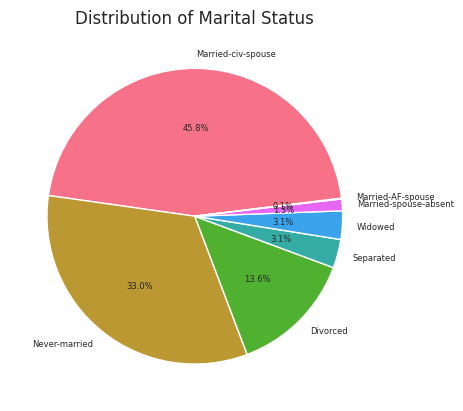

In [21]:
df['marital-status'].value_counts().plot(kind='pie', color=plt.cm.Paired.colors, autopct='%1.1f%%', fontsize=6,startangle=7)
plt.title('Distribution of Marital Status')
plt.ylabel('')
plt.show()

#### 4.6.1. df['marital-status']
* Categorical column
* Imbalanced distribution

### 4.7. df['occupation']

In [22]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Private              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

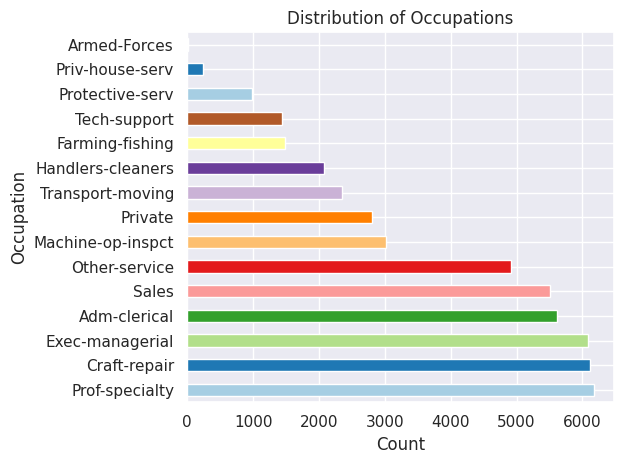

In [23]:
df['occupation'].value_counts().plot(kind='barh', color=plt.cm.Paired.colors)

plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Distribution of Occupations')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

#### 4.7.1. df['occupation']
* Categorical column
* Moderately imbalanced

### 4.8. df['relationship']

In [24]:
df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

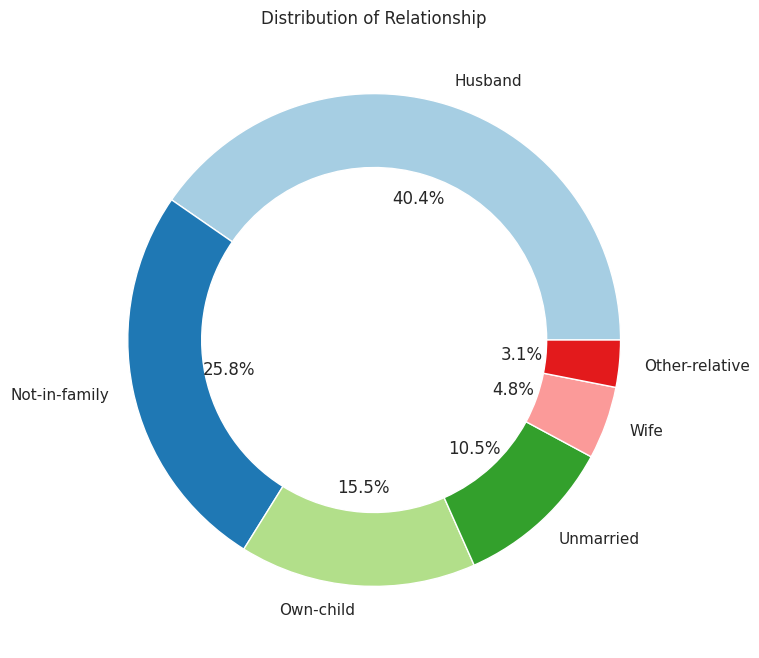

In [25]:
relationship_counts = df['relationship'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(relationship_counts, labels=relationship_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3})
plt.title('Distribution of Relationship')
plt.show()

#### 4.8.1. df['relationship']
* Categorical column
* Imbalanced: "Husband" appears dominant

### 4.9. df['race']

In [28]:
race_counts = df['race'].value_counts()

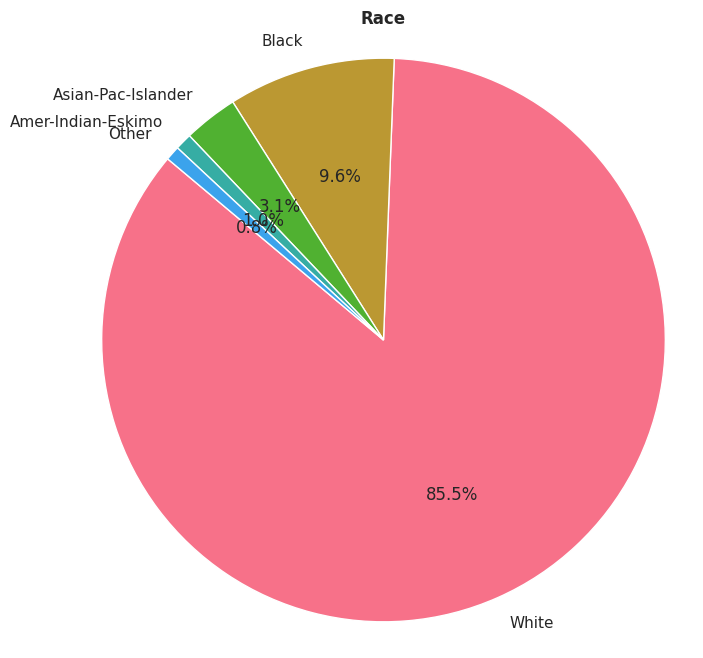

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Race', fontweight='bold')
plt.axis('equal')
plt.show()

#### 4.9.1. df['race']
* Categorical column
* Highly imbalanced: White is dominant

### 4.10. df['gender']

In [35]:
df['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

<Axes: title={'center': 'Gender Distribution'}, xlabel='Gender', ylabel='Count'>

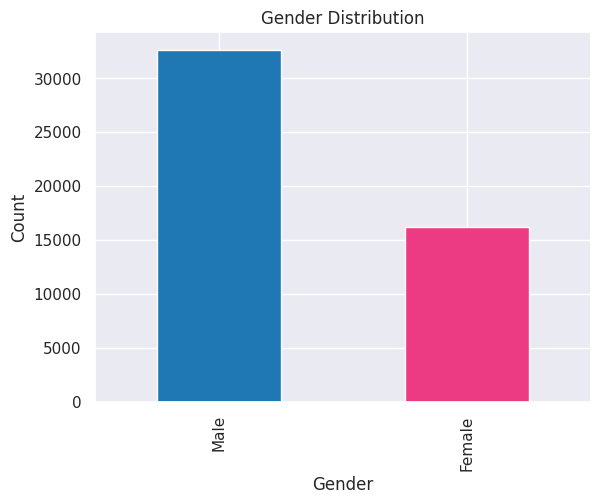

In [40]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution', xlabel='Gender', ylabel='Count', color=['#1f77b4', '#ec3b83'])

#### 4.10.1. df['gender']
* Binary categorical (Male/Female)
* Slightly imbalanced towards Male

In [43]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387])

In [46]:
df['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754])

In [48]:
df['hours-per-week'].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95])

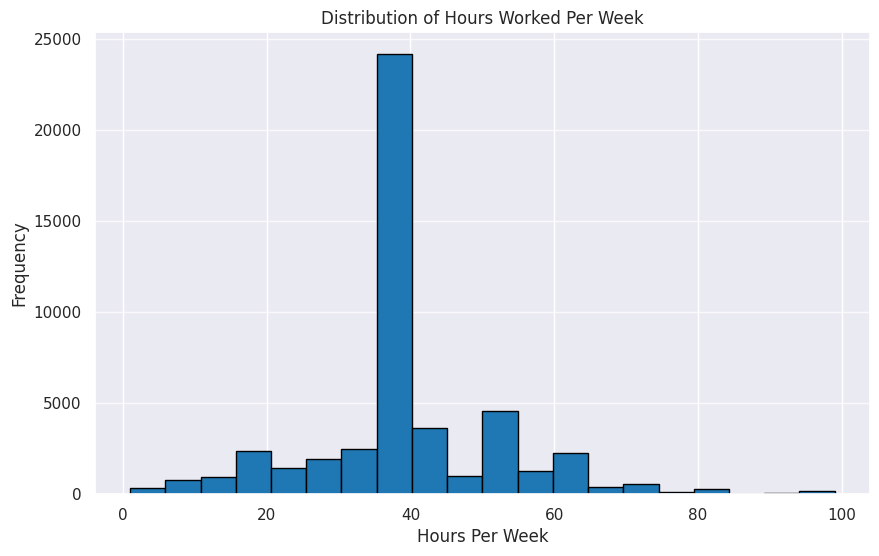

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df['hours-per-week'], bins=20, color='#1f77b4', edgecolor='black')
plt.title('Distribution of Hours Worked Per Week')
plt.xlabel('Hours Per Week')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [64]:
df['native-country'].nunique()

42

<Axes: ylabel='native-country'>

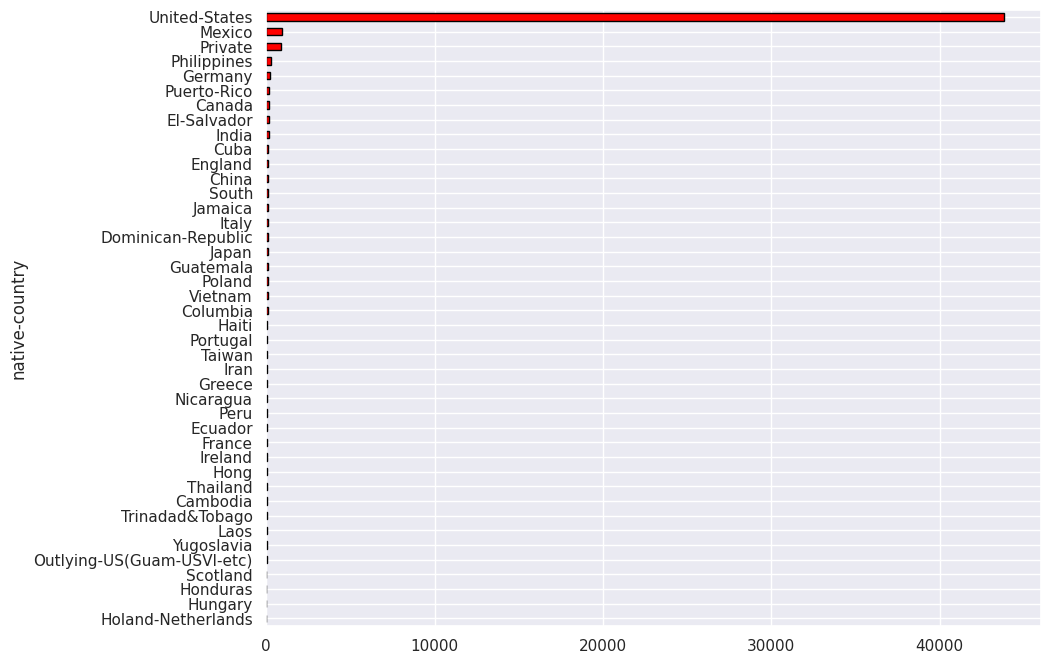

In [54]:
df['native-country'].value_counts().sort_values(ascending=True).plot(kind='barh', color='red', edgecolor='black', figsize=(10, 8))

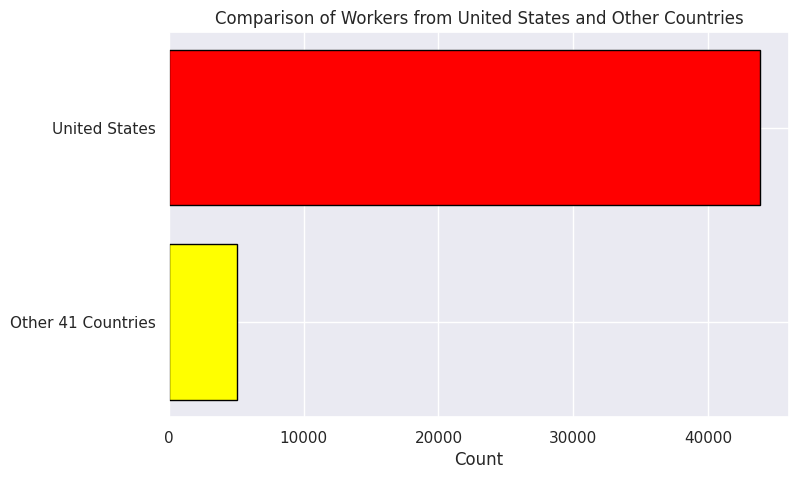

In [71]:
united_states_count = df['native-country'].value_counts().pop('United-States')
other_count = df['native-country'].value_counts().drop('United-States').sum()

counts = [other_count, united_states_count]
labels = ['Other 41 Countries','United States']

plt.figure(figsize=(8, 5))
plt.barh(labels, counts, color=['yellow', 'red'], edgecolor='black')
plt.title('Comparison of Workers from United States and Other Countries')
plt.xlabel('Count')
plt.show()

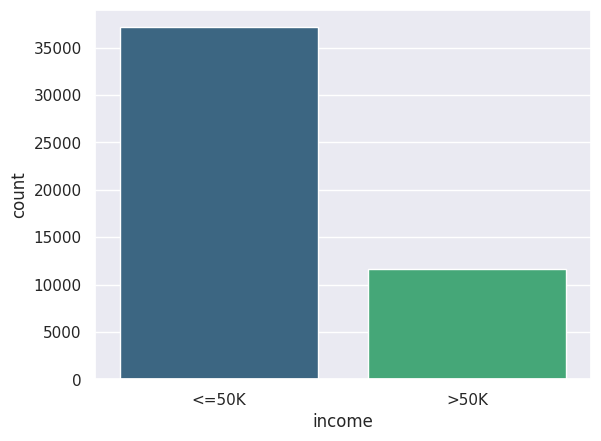

In [80]:
sns.countplot(data=df, x='income', palette='viridis');

In [120]:
df['income'] = df['income'].map({'>50K': True, '<=50K': False})

In [121]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,True
4,18,Private,103497,Some-college,10,Never-married,Private,Own-child,White,Female,0,0,30,United-States,False


In [116]:
del df['education_numeric']

## 5. Exploratory data analysis

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  bool  
dtypes: bool(1), int64(6), object(8)
memory usage: 5.3+ MB


In [122]:
df.corr(numeric_only=True)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


<Axes: >

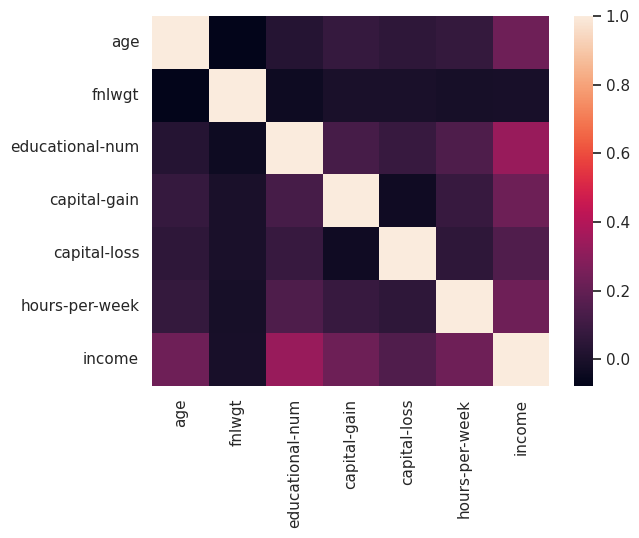

In [123]:
sns.heatmap(df.corr(numeric_only=True))

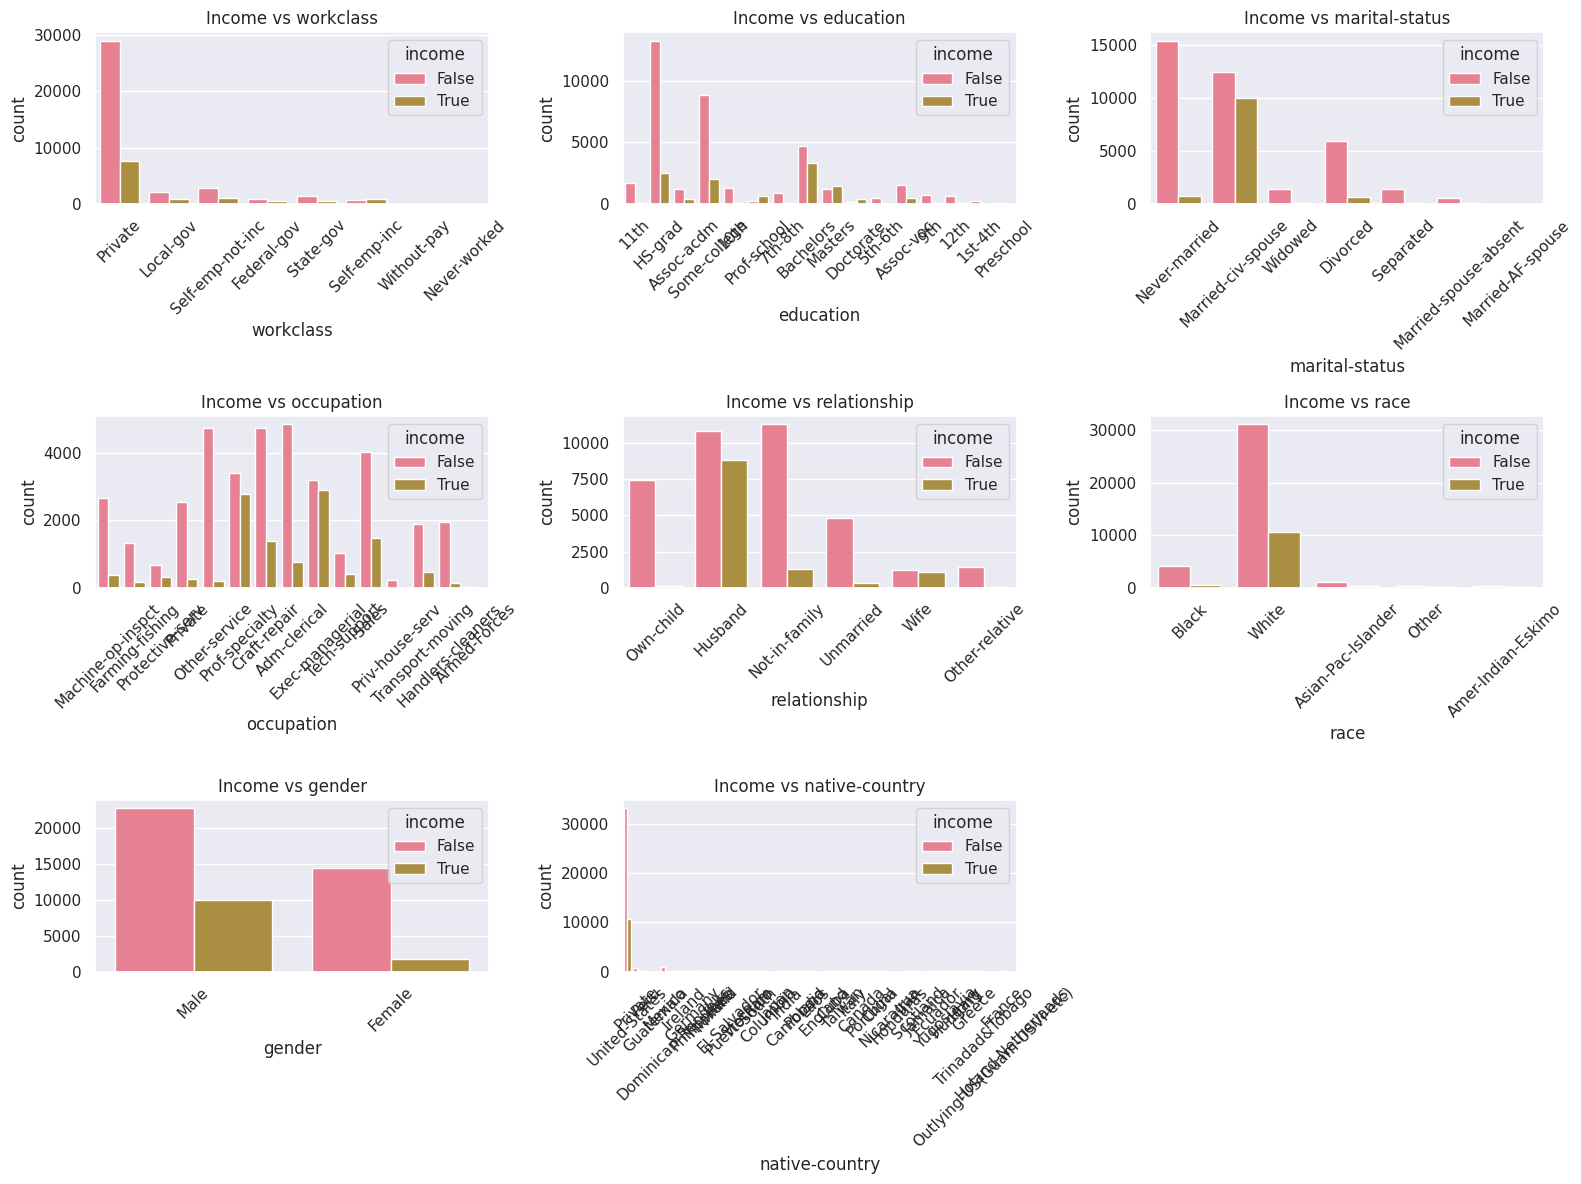

In [125]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, hue='income')
    plt.title(f"Income vs {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop('income', axis=1))
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

fnlwgt                                       0.168241
age                                          0.151018
capital-gain                                 0.093129
hours-per-week                               0.084390
marital-status_Married-civ-spouse            0.068808
                                               ...   
education_Preschool                          0.000041
native-country_Outlying-US(Guam-USVI-etc)    0.000035
native-country_Honduras                      0.000017
workclass_Never-worked                       0.000007
native-country_Holand-Netherlands            0.000000
Length: 107, dtype: float64


In [127]:
pd.set_option('display.max_rows', None)
print(importances)

fnlwgt                                       0.168241
age                                          0.151018
capital-gain                                 0.093129
hours-per-week                               0.084390
marital-status_Married-civ-spouse            0.068808
educational-num                              0.059735
relationship_Husband                         0.038162
capital-loss                                 0.032593
marital-status_Never-married                 0.026594
occupation_Exec-managerial                   0.018054
occupation_Prof-specialty                    0.014945
education_Bachelors                          0.011715
relationship_Not-in-family                   0.010806
gender_Female                                0.010260
workclass_Private                            0.009983
relationship_Wife                            0.009347
gender_Male                                  0.008265
workclass_Self-emp-not-inc                   0.007643
education_Masters           

## 6. Conclusion and Recommendations
This dataset can be used to estimate whether a person's income level is above 50K. As a result of our analysis:

1. There is a strong relationship between education level and income
2. There is a positive correlation between working hours and income
3. Age and work experience are important factors affecting income level

In the light of this data:
* Can be used in salary setting policies for HR departments
* Income forecasting in career counseling services
* Can be used as a reference in companies' recruitment processes

Proposed ML Models:
1. Random Forest Classifier
2. Gradient Boosting Classifier
3. XGBoost

These models are suitable for this problem with their ability to handle categorical and numerical variables together, to capture non-linear relationships and to show high performance.